<a href="https://colab.research.google.com/github/Anthonyyoyo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/AnthonyG_LS_DS_113_Making_Data_backed_Assertions_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

#Loading in Data

In [1]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

df.head(20)

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


#Checking Attributes

In [2]:
#Check no. of rows and columns
print(df.shape, '\n')


#Check data type

print(df.info())


#Check for any missing variables
print('\n', df.isna().sum())


#Summary statistics of data
df.describe()

(1200, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
Unnamed: 0       1200 non-null int64
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(4)
memory usage: 37.6 KB
None

 Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64


,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


#Fixing Dataset

In [3]:
print(df.columns)


df = df.rename(columns={'Unnamed: 0': 'ID'})
df.head()

Index(['Unnamed: 0', 'age', 'weight', 'exercise_time'], dtype='object')


,ID,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


#Data Analysis

In [0]:
#Putting variables into bins
age_bins = pd.cut(df['age'], 6)
weight_bins = pd.cut(df['weight'], 4)
exercise_bins = pd.cut(df['exercise_time'], 4)


#Converting bins into str to avoid error
weight_bins = weight_bins.astype(str)
age_bins = age_bins.astype(str)
exercise_bins = exercise_bins.astype(str)



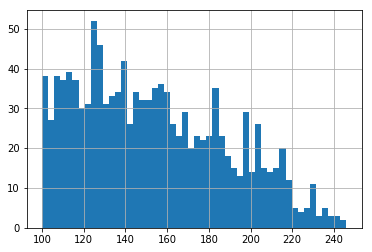

In [5]:
df['weight'].hist(bins=50)

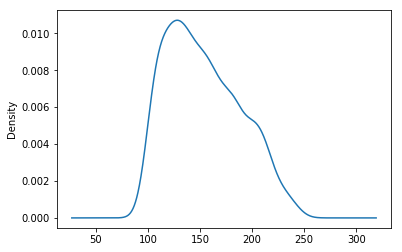

In [6]:
df['weight'].plot.density()

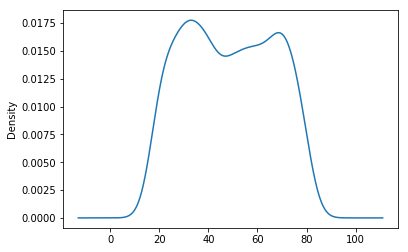

In [7]:
df['age'].plot.density()

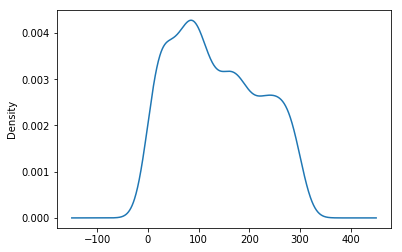

In [8]:
df['exercise_time'].plot.density()

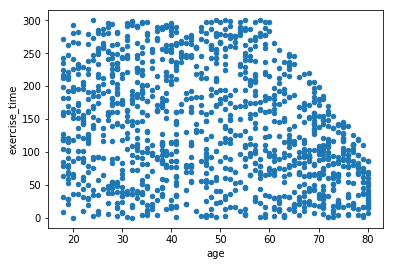

In [9]:
df.plot.scatter('age', 'exercise_time')

#From the scatter plot, it is clear that exercise time reduces starting from 60 going to 80 years

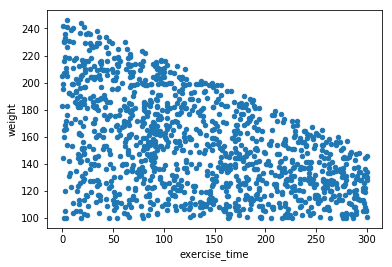

In [10]:
df.plot.scatter('exercise_time', 'weight')
#Implication is that weight reduces with increase in exercise time

In [26]:

#Exercise_time vs weight
ex_wgt = pd.crosstab(exercise_bins, weight_bins, normalize='columns')
ex_wgt.head()

weight,"(136.5, 173.0]","(173.0, 209.5]","(209.5, 246.0]","(99.854, 136.5]"
exercise_time,,,,
"(-0.3, 75.0]",0.224181,0.422925,0.802083,0.180617
"(150.0, 225.0]",0.261965,0.146245,0.000000,0.264317
"(225.0, 300.0]",0.221662,0.000000,0.000000,0.334802
"(75.0, 150.0]",0.292191,0.430830,0.197917,0.220264


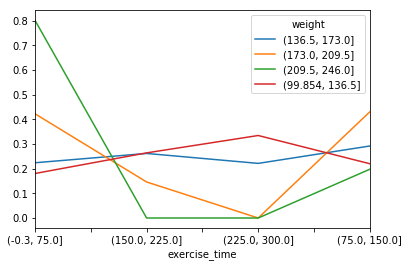

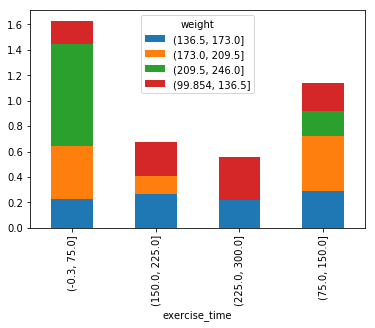

In [27]:
#Plotting for exercise time vs Weight
ex_wgt.plot()


ex_wgt.plot(kind='bar', stacked=True)
#This plot depicts the total weight trend at different exercise times. With increase in exercise time, weight reduces.

In [28]:
#Age vs Weight
ag_exe = pd.crosstab(age_bins, exercise_bins, normalize='columns')
ag_exe.head(6)

exercise_time,"(-0.3, 75.0]","(150.0, 225.0]","(225.0, 300.0]","(75.0, 150.0]"
age,,,,
"(17.938, 28.333]",0.129577,0.241379,0.204167,0.148256
"(28.333, 38.667]",0.169014,0.210728,0.220833,0.142442
"(38.667, 49.0]",0.118310,0.160920,0.275000,0.145349
"(49.0, 59.333]",0.112676,0.160920,0.237500,0.130814
"(59.333, 69.667]",0.183099,0.180077,0.062500,0.188953
"(69.667, 80.0]",0.287324,0.045977,0.000000,0.244186


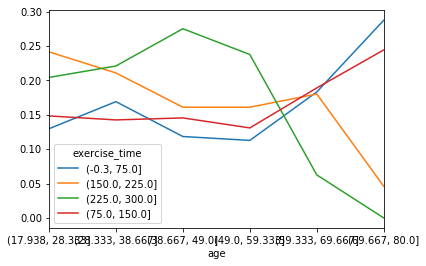

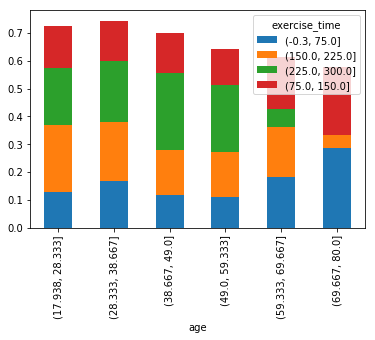

In [31]:
ag_exe.plot()


ag_exe.plot(kind='bar', stacked=True)
#This plot depicts the total exercise time trend for people at different age groups. It appears that people with increasing age, exercise time reduces

In [0]:
# #What are the variable types in the data?
# - They are all continuous variables

In [0]:
# #What are the relationships between the variables?
# - It appears that as we grow older, we are prone to increases in weight. Most older individuals have less exercise time in the range 65-80 years. 
# - Also, increasing exercise time reduces weight.

In [0]:
# # Which relationships are "real", and which spurious?
# - Age and Weight are spurious

# - Age and  exercise time, Exercise and weight are real

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)